# Assignment 7

- word embedding: word2vec, GloVe

- t-SNE

In [27]:
from gensim.models import word2vec
import numpy as np 
import pandas as pd
import numpy as np
import scipy
from sklearn.manifold import TSNE
from random import sample
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from tqdm import tqdm

# Using gensim for word2vec and glove

In [2]:
# Download the text8 dataset from http://mattmahoney.net/dc/text8.zip
# Iterate over sentences from the “text8” corpus
sentences = word2vec.Text8Corpus('/Users/wenxinxu/Desktop/SDS565/data/text8')

# vector_size: Dimensionality of the word vectors. window : Maximum distance between the current and predicted word within a sentence.
# min_count: Ignores all words with total frequency lower than this.
model = word2vec.Word2Vec(sentences, vector_size=100, window=10, min_count=10)

## Exploring linear relationships between word embeddings

Suppose I want to see what the model thinks about the pairing of words "English" and "river."

We can add their embeddings together and find the closest words.

In [3]:
target = model.wv['english']+model.wv['river']

# Find the top-N most similar keys. computes cosine similarity between given embedding and each embedding in model
model.wv.most_similar([target],topn=10)

[('river', 0.7925704717636108),
 ('english', 0.695111095905304),
 ('estuary', 0.6663466095924377),
 ('strait', 0.656229555606842),
 ('thames', 0.6304806470870972),
 ('meuse', 0.6290670037269592),
 ('rivers', 0.6288830041885376),
 ('elbe', 0.6206637620925903),
 ('peninsula', 0.6016146540641785),
 ('danube', 0.5940157771110535)]

We can also simply use the `most_similar` function by specifying the words.

In [4]:
# Find the top-N most similar keys. Positive keys contribute positively towards the similarity, negative keys negatively.
model.wv.most_similar(positive=['river','english'])

[('estuary', 0.635121762752533),
 ('strait', 0.6286590695381165),
 ('thames', 0.6033148765563965),
 ('meuse', 0.5999554991722107),
 ('elbe', 0.5928106307983398),
 ('rivers', 0.5904154181480408),
 ('welsh', 0.588110089302063),
 ('peninsula', 0.5789723992347717),
 ('scots', 0.5644308924674988),
 ('rhine', 0.5642333626747131)]

# Words similarity

Explore three other relationships below and discuss your findings.

**Answer here**

1. First relationship: country and its drink, the result of France is more accurate than that of Japan


2.  Second relationship: country and its universities, the result of America is more accurate than that of China, the latter is similar to country and its cities.


3. Third relationship: country and its artists, all the results of Holland, France and Japan are not very accurate.

In [15]:
pos_words = [['france', 'drink'], ['japan', 'drink'],
       ['university','china'], ['university','america'],
       ['artist','holland'], ['artist','france']]

words = [[item[0] for item in model.wv.most_similar(positive=word)] for word in pos_words]

pd.DataFrame(data=words, index=[words[0] + '_' + words[1] for words in pos_words])

,0,1,2,3,4,5,6,7,8,9
france_drink,meat,tea,wine,beer,drinks,vodka,beef,absinthe,rum,brewed
japan_drink,tea,miso,spicy,beverage,beef,drinks,beer,dish,meat,vodka
university_china,singapore,shanghai,tokyo,thailand,india,wuhan,taiwan,tibet,malaysia,taipei
university_america,univ,carolina,college,institute,dartmouth,yale,dakota,harvard,ucla,cornell
artist_holland,auguste,anton,cartoonist,playwright,painter,ole,sculptor,balanchine,innovator,angelo
artist_france,auguste,opera,painter,picasso,ballet,jacques,manet,belgian,georges,pierre


## Analogies
Another striking phenomena is the ability to identify analogies using linear algebra relationships

Man is to King as What is to Queen?
In class we saw that one way to model this is by subtraction!

$$\phi(Man) - \phi(King) \approx \phi(What) - \phi(Queen)$$

In [ ]:
model.wv.most_similar(positive=['man','queen'],negative=['king'])

[('woman', 0.7295663356781006),
 ('girl', 0.6638750433921814),
 ('lady', 0.6609997749328613),
 ('bride', 0.5972762703895569),
 ('maid', 0.5867975950241089),
 ('blonde', 0.578168511390686),
 ('baby', 0.5767822265625),
 ('lovely', 0.5542733669281006),
 ('wonder', 0.5457874536514282),
 ('miss', 0.5427759885787964)]

good is to yale as what is to harvard

$$\phi(good) - \phi(yale) \approx \phi(what) - \phi(harvard)$$

In [ ]:
model.wv.most_similar(positive=['good','harvard'],negative=['yale'])

[('bad', 0.6291990280151367),
 ('poor', 0.5821027755737305),
 ('reasonable', 0.5245106220245361),
 ('pleasure', 0.5229665040969849),
 ('comfortable', 0.5145583152770996),
 ('practical', 0.5107746720314026),
 ('easy', 0.49849483370780945),
 ('simple', 0.49517983198165894),
 ('desirable', 0.49171724915504456),
 ('happiness', 0.485836923122406)]

Before you find the above one too amusing just see what happens if you switch harvard and yale

In [ ]:
model.wv.most_similar(positive=['good','yale'],negative=['harvard'])

[('bad', 0.6980096697807312),
 ('luck', 0.6243534088134766),
 ('happy', 0.5880774259567261),
 ('nobody', 0.5405392646789551),
 ('everybody', 0.5391825437545776),
 ('yourself', 0.5371073484420776),
 ('courage', 0.5317493081092834),
 ('pretty', 0.5305766463279724),
 ('fun', 0.5188425183296204),
 ('hope', 0.5149434208869934)]

In [ ]:
## Apparently the word closest to bad is luck, but the second closest is good?
model.wv.most_similar(positive=['bad'])

[('luck', 0.7257006168365479),
 ('good', 0.7186274528503418),
 ('feeling', 0.6545383334159851),
 ('unpleasant', 0.6205524206161499),
 ('everybody', 0.6203740835189819),
 ('pretty', 0.6137819886207581),
 ('fear', 0.6101529598236084),
 ('ugly', 0.6079035997390747),
 ('foolish', 0.6070326566696167),
 ('shy', 0.6049719452857971)]


Explain why it might make sense that on a small dataset 'bad' and 'good' are similar words.

**Answer here:**

Because "bad" and "good" may occur at close position when evaluating a thing, while other words, such as "everybody", "fear", "ugly", "foolish", "shy" are more unrelated with "bad" than "good"


Explore three more analogies and report your findings below

In [ ]:
prompts = [[['paris','thailand'], ['france']], 
           [['panda','australia'],['china']],
           [['sushi','italy'],['japan']]]

words = [[item[0] for item in model.wv.most_similar(positive=prompt[0],negative=prompt[1])] for prompt in prompts] 

pd.DataFrame(data=(words), index=[prompt[0][0] + '-' + prompt[1][0] + '+' + prompt[0][1] for prompt in prompts])

,0,1,2,3,4,5,6,7,8,9
paris-france+thailand,shanghai,tokyo,baku,bangkok,dar,salaam,taipei,kobe,chongqing,dubai
panda-china+australia,kangaroo,bird,wild,koala,kangaroos,bee,kiwi,orca,mammal,marsupials
sushi-japan+italy,margherita,chianti,marche,spada,vecchio,firenze,montmartre,mozzarella,auvergne,whipped


1. First analogies

    Paris is to France as What is to Thailand

    I hope to find capital of a country, the result is not so good since Bangkok ranked only 3, the top 2 most similar are peking and beijing, which is capital of China

$$\phi(Paris) - \phi(France) \approx \phi(What) - \phi(Thailand)$$

2. Second analogies:

    Panda is to China as what is to Australia

    I wish to find special species of a country, the result is good since kangaroo, koala, kiwi are indeed special species of Australia

$$\phi(Pandas) - \phi(China) \approx \phi(What) - \phi(Australia)$$

3. Third analogies:

    Sushi is to Japan as what is to Italy

    I hope to find special food of a country, the result is not so good, the margherita pizza, pastry, pam prosciutto, and risotto are indeed special food of Italy, but salerno, apulia are cities of Italy and politecnico is a university of Italy.

$$\phi(Sushi) - \phi(Japan) \approx \phi(What) - \phi(Italy)$$

# Glove

import a pre-trained Glove model from gensim

In [18]:
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


Find the closest words to 'yale', 'computers', 'science', 'teach'

**The closest words is 'harvard', 'computer', 'sceinces, 'learn' respectively.**

In [20]:
pos_words = ['yale', 'computers', 'science', 'teach']

words = [[item[0] for item in glove.most_similar(positive=[word])] for word in pos_words]

pd.DataFrame(data=words, index=pos_words)

,0,1,2,3,4,5,6,7,8,9
yale,harvard,princeton,university,cornell,stanford,graduate,professor,graduated,college,dartmouth
computers,computer,pcs,laptops,phones,devices,laptop,machines,desktop,software,pc
science,sciences,physics,institute,mathematics,studies,research,biology,university,psychology,economics
teach,learn,taught,teaching,teaches,lessons,educate,teachers,learned,students,learning


# Music embeddings with word2vec instead of PCA

In HW6 you saw the connection between word2vec and PCA. 

The word2vec code does some additional processing to balance out words (in this case **artists**) that appear more often in the sentences (in our case **playlists**)

In [21]:
leadstring = '/Users/wenxinxu/Desktop/SDS565/data/playlists/'
with open(leadstring+'artists.txt','r') as f:
    artists=f.readlines()

# a dict mapping code to artist e.g., 941: 'By The Tree'
codetoartist = {j : artists[j].strip() for j in range(len(artists))}

# a dict mapping artist to code e.g., 'By The Tree': 941
artisttocode = {artists[j].strip() : j for j in range(len(artists))}


# construct the sentences object using the playlists file
# Iterate over a file that contains sentences: one line = one sentence. 
# Words must be already preprocessed and separated by whitespace.
sentences = word2vec.LineSentence('/Users/wenxinxu/Desktop/SDS565/data/playlists/playlists.txt')
model = word2vec.Word2Vec(sentences, vector_size=100, window=100, min_count=1) 

## Similar artists

After you train your model find the artist most similar to Jay-Z (artist code 3280). 

In the below code we use a **string** `'3280'` for the code. 

**Because elements in a vocabulary should be string type and artists are represented as codes in the playlists.**

In [23]:
[codetoartist[int(j[0])] for j in model.wv.similar_by_word(str(artisttocode['Jay-Z']))]

['Nicki Minaj',
 'Aaliyah',
 'Jeremih',
 'Lil Wayne',
 'The Notorious B.I.G.',
 'Chris Brown & Tyga',
 'Chris Brown',
 'Drake',
 'T-Pain',
 'Wiz Khalifa']

## Artist analogies

Try out artist analogies. Make three analogies. Comment on your results.

**Comment**

1. 2Pac' is to 'Drake' as What is to 'The Notorious B.I.G.'? 'Terror Squad'

    Result is good, all the artists are hip hop genre.

2. Curtis Mayfield' is to 'MJ' as What is to 'Babyface'? 'Stevie Wonder
    
    Result is good, the former are soul and funk genre, while the latter are R&B genre.

3. Jimmy Hicks & The Voices Of Integrity' is to 'Bruce Springsteen & The E Street Band'as What is to 'Billy Vera & The Beaters'? ''Fantasia

    Result is kind of confusing since the first artist is Christian/gospel, the second is rock, the third is R&B, the last is improvisation.

4. David Benoit' is to 'Fito Olivares' as What is to 'Frankie Goes To Hollywood'? 'Shontelle'
    
    The result is kind of confusing since the first is Jazz, the second is Mexican cumbia, the third is Hi-NRG, the last is R&B.


In [ ]:
codetoartist[1567], codetoartist[2616], codetoartist[1469]

('2Pac', 'The Notorious B.I.G.', 'Drake')

'2Pac' is to 'Drake' as What is to 'The Notorious B.I.G.'?: **'Terror Squad'**

$\phi(2Pac) - \phi(Drake) \approx \phi(What) - \phi(The\ Notorious\ B.I.G.)$

In [ ]:
# 1567 - 1469 = what - 2616
[codetoartist[int(j[0])] for j in model.wv.most_similar(positive=['1567','2616'],negative=['1469'])]

['Terror Squad',
 'Bell Biv Devoe',
 'California Swag District',
 'Gucci Mane',
 '50 Cent',
 'Twista',
 '2 Pistols',
 'Bow Wow',
 'Unk',
 'Juvenile']

Analogies 1

'Curtis Mayfield' is to 'MJ' as What is to 'Babyface'?: **'Stevie Wonder'**


$\phi(Curtis\ Mayfield) - \phi(MJ) \approx \phi(What) - \phi(Babyface)$

In [ ]:
codetoartist[235], codetoartist[525], codetoartist[890]

('Curtis Mayfield', 'Babyface', 'MJ')

In [ ]:
[codetoartist[int(j[0])] for j in model.wv.most_similar(positive=['235','525'],negative=['890'])]

['Stevie Wonder',
 'Bill Withers',
 "The O'Jays",
 'Otis Redding',
 'The Chi-Lites',
 'The Five Stairsteps',
 'Lou Rawls',
 'Barry McGuire',
 'The American Breed',
 'The Association']

Analogies 2

'Jimmy Hicks & The Voices Of Integrity' is to 'Bruce Springsteen & The E Street Band'as What is to 'Billy Vera & The Beaters'?: **''Fantasia''**


$
\phi(Jimmy\ Hicks\  \&\ The\ Voices\ Of\ Integrity) - \phi(Bruce\ Springsteen\ \&\  The\ E\ Street\ Band) \approx \phi(What) - \phi(Billy\ Vera\ \&\  The\ Beaters)
$

In [ ]:
codetoartist[728], codetoartist[190], codetoartist[1004]

('Jimmy Hicks & The Voices Of Integrity',
 'Billy Vera & The Beaters',
 'Bruce Springsteen & The E Street Band')

In [ ]:
[codetoartist[int(j[0])] for j in model.wv.most_similar(positive=['728','190'],negative=['1004'])]

['Fantasia',
 'Versatile',
 'Fast Life Yungstaz',
 'Faith Evans',
 'Bow Wow',
 "Cam'ron",
 'Future Fambo & Beenie Man',
 'The S.O.S. Band',
 'Wayne Wonder',
 'John Brown']

Analogies 3

'David Benoit' is to 'Fito Olivares'as What is to 'Frankie Goes To Hollywood'?: **'Shontelle'**


$
\phi(David\ Benoit) - \phi(Fito\ Olivares) \approx \phi(What) - \phi(Frankie\ Goes\ To\ Hollywood)
$

In [15]:
codetoartist[1123], codetoartist[248], codetoartist[743]

('David Benoit', 'Frankie Goes To Hollywood', 'Fito Olivares')

In [ ]:
[codetoartist[int(j[0])] for j in model.wv.most_similar(positive=['1123','248'],negative=['743'])]

['Shontelle',
 "Evelyn 'Champagne' King",
 'OneRepublic & Timbaland',
 'Champaign',
 'Duffy',
 'Sarah McLachlan',
 'Gavin DeGraw',
 'Beyonce',
 'Shaggy',
 'Elliott Yamin']

## TSNE visualization

Pick a few artists and show their names on the plot, comment on your findings.

**Comment:**

- The first group of 10 artists I picked were the top 10 artists cloest to "Notorious B.I.G" found by the previous word2vec model in Problem 5. 

  In the t-SNE plot 1 below, they are squeezed together. 

- The second group of 10 artists I picked were 10 random artists in the artist list

  In the t-SNE plot 2 below, they are scattered.

-  The difference is because t-SNE try to minimize the divergence between 2 distributions: 

  - if embedding vectors are very close to each other, t-SNE will pull the corresponding visualization vectors to be more close.

  -  if embedding vectors are very far away from each other, t-SNE will push the corresponding visualization vectors to be more further away.


In [26]:
leadstring = '/Users/wenxinxu/Desktop/SDS565/data/playlists/'
with open(leadstring+'artists.txt','r') as f:
    artists=f.readlines()
pl = pd.read_csv(leadstring+'playlists.txt',header=None)

# a dict mapping code to artist e.g., 941: 'By The Tree'
codetoartist = {j : artists[j].strip() for j in range(len(artists))}

# a dict mapping artist to code e.g., 'By The Tree': 941
artisttocode = {artists[j].strip() : j for j in range(len(artists))}

# create sparse matrix X (18111, 3292) 
d = pl.to_dict()[0]
inds = [(j,[int(k) for k in d[j].strip().split(' ')]) for j in range(len(d))]
vals = np.ones(len([k for j in inds for k in j[1]])) # (189900,)
i2 = [([j[0]]*len(j[1]),j[1]) for j in inds]

row_ind = [k for j in i2 for k in j[0]]
col_ind = [k for j in i2 for k in j[1]]

X = scipy.sparse.csr_matrix((vals,(row_ind, col_ind))) # (18111, 3292)  Compressed Sparse Row matrix  X[row_ind[k], col_ind[k]] = data[k]
A,s,vt = scipy.sparse.linalg.svds(X.T, k=10)

# artist embedding
alphahat = TSNE(n_components=2,perplexity=20, init='pca', learning_rate='auto').fit_transform(A) # (3292, 2)

/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


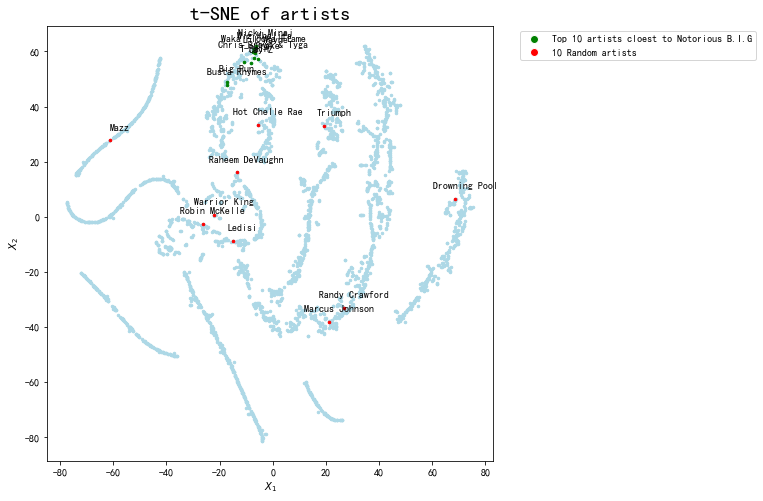

In [48]:
# top 10 artists cloest to "Notorious B.I.G"
artists_notorious_big = [codetoartist[int(j[0])] for j in model.wv.similar_by_word(str(artisttocode['The Notorious B.I.G.']))]
# 10 artists randomly sampled from artist list
random_artists = sample(list(artisttocode), 10)

plt.figure(figsize=(8, 8))
plt.plot(alphahat[:,0],alphahat[:,1],'.', markersize=5, color='lightblue')

for artist in artists_notorious_big:
    code=artisttocode[artist]
    plt.plot(alphahat[code,0] ,alphahat[code,1], '.', markersize=5, color="green")
    plt.annotate(text=artist, xy=(alphahat[code,0] ,alphahat[code,1]), xytext=(10, 10), textcoords="offset pixels", color='black', ha='center')

for artist in random_artists:
    code=artisttocode[artist]
    plt.plot(alphahat[code,0] ,alphahat[code,1], '.', markersize=5, color="red")
    plt.annotate(text=artist, xy=(alphahat[code,0] ,alphahat[code,1]),xytext=(10, 10), textcoords="offset pixels", color='black', ha='center')

plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

legend_elements = [Line2D([0], [0], marker='o', color='w', label="Top 10 artists cloest to Notorious B.I.G",
                          markerfacecolor='green', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label="10 Random artists",
                          markerfacecolor='red', markersize=8)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.6, 1))

plt.title("t-SNE of artists", fontsize=20)
plt.show()

# GloVe

Train an embedding based on the glove model. 

words (artists) that appear more often in the sentences (playlists)

for the same artist just set the co-occuurence to zero, $c_{w,w} = 0$. i.e., don't deal with it in optimization.

## Making cooccurences matrix

### Method 1 sparse matrix

- co-occurrence matrix $C \in \mathbb{R}^{3292 \times 3292}$ is squares of sparse matrix $X \in \mathbb{R}^{18111 \times 3292}$
$$
C = X^T X
$$

In [49]:
leadstring = '/Users/wenxinxu/Desktop/SDS565/data/playlists/'
with open(leadstring+'artists.txt','r') as f:
    artists=f.readlines()
pl = pd.read_csv(leadstring+'playlists.txt',header=None)

# a dict mapping code to artist e.g., 941: 'By The Tree'
codetoartist = {j : artists[j].strip() for j in range(len(artists))}

# a dict mapping artist to code e.g., 'By The Tree': 941
artisttocode = {artists[j].strip() : j for j in range(len(artists))}

# create sparse matrix X (18111, 3292) 
d = pl.to_dict()[0]
inds = [(j,[int(k) for k in d[j].strip().split(' ')]) for j in range(len(d))]
vals = np.ones(len([k for j in inds for k in j[1]])) # (189900,)
i2 = [([j[0]]*len(j[1]),j[1]) for j in inds]

row_ind = [k for j in i2 for k in j[0]]
col_ind = [k for j in i2 for k in j[1]]

X = scipy.sparse.csr_matrix((vals,(row_ind, col_ind))) # (18111, 3292)  Compressed Sparse Row matrix  X[row_ind[k], col_ind[k]] = data[k]
# co-occurence matrix  (3292, 3292)
C = X.T @ X
C.setdiag(0) # for the same artist, set the co-occurrence to zero.

### Method 2 numpy arrays and for-loop

In [51]:
len(artists)

3292

In [52]:
leadstring = '/Users/wenxinxu/Desktop/SDS565/data/playlists/'
with open(leadstring+'artists.txt','r') as f:
    artists=f.readlines()

with open(leadstring+'playlists.txt','r') as f:
    sentences=f.readlines()

# codes of playlist without row index
sentenceslist = [list(map(int, j.strip().split(' '))) for j in sentences] 

# co-occurence matrix (3292, 3292)
C = np.zeros((len(artists), len(artists)))
for sentence in sentenceslist: # j is a sentence (playlist)
    for context in sentence: # a is context word (artsit)
        for target in sentence: # b is target word (artsit)
            C[context, target] += 1 # the number of times target word (artist) occurs with the context of word (artist) together

np.fill_diagonal(C,0)  # for the same artist just set the co-occuurence to zero.

## Train glove model

Training objective: weighted least square loss

$$
\hat {\mathbf{w}}_a,  \hat {\mathbf{w}}_b=\underset{\mathbf{w}_a, \mathbf{w}_b}{\arg \min} \sum_{a,b}^{|V|} f(C_{a,b}) (\mathbf{w}_a^T \mathbf{w}_b - \log(C_{a,b}))^2
$$

$\mathbf{w}_a \in \mathbb{R}^{d}$ is embedding for target artist $a$, $\mathbf{w}_b \in \mathbb{R}^{d}$ is embedding vector for context artist $b$.

Take the weight function $f(C_{a,b}) = \min(1,(C_{a,b}/100)^{3/4})$. 

optimize the above objective using gradient descent.

Gradient of loss with respect to $\mathbf{w}_a$

$$
\frac{\partial l}{\partial {\mathbf{w}_a}}=\sum_{b=1}^{|V|}f(C_{a,b})\mathbf{w}_b (\mathbf{w}_a^T \mathbf{w}_b - \log(C_{a,b})) \in \mathbb{R}^{d}
$$

Gradient of loss with respect to $\mathbf{w}_b$

$$
\frac{\partial l}{\partial {\mathbf{w}_b}}=\sum_{a=1}^{|V|}f(C_{a,b})\mathbf{w}_a (\mathbf{w}_a^T \mathbf{w}_b - \log(C_{a,b})) \in \mathbb{R}^{d}
$$

**Comment**

- I trained my Glove model by full gradient descent with step size 3*10e-5 and 100 dimensionality of embedding

- I plot the weighted squared loss with respect to iteration times (epochs): After 100 epochs, loss is about 10e4
    
- I also compared the loss of my Glove model to loss of word2vec model and loss of PCA model

    It turns out their loss are about 10e6, so the loss of my Glove model in the reasonable scale

In [57]:
from typing import List 

In [58]:
class Glove:

    def __init__(self, D: int=100, V: int=3292):
        """
        D: dimension of embedding
        V: size of word vocabulary
        """
        self.D = D
        self.V = V

    def fit(self, sentences: List[List[int]], step_size: float=3*10e-5, epochs: int=100, xmax: int=100, alpha: float=0.75):
        """
        Train Glove model using full gradient descent, plot loss

        @Params
        sentences: a list of sentences
        step_size: learning rate, default to 3*10e-5
        epochs: number of iterations, default to 100
        xmax: max value in the co-occurrence matrix, defaul to 100
        alpha: power of weight function, default to 3/4
        """
        D = self.D
        V = self.V

        # create a co-occurrence matrix, np.array shape (V,V)
        C = np.zeros((V, V))
        for sentence in sentences:  # a sentence is a playlist
            for a in sentence:  # a is context word (artsit)
                for b in sentence:  # b is target word (artsit)
                    C[a, b] += 1  # the number of times target word (artist) a occurs with the context of word (artist) b together
        np.fill_diagonal(C, 0)  # for the same artist just set the co-occuurence to zero.
        C[C == 0] = 1   # set unobserved pairs to 1 to avoid log0 error

        # weight function
        fX = np.zeros((V, V))
        fX[C < xmax] = (C[C < xmax] / float(xmax))**alpha
        fX[C >= xmax] = 1
        
        # randomly initiate word embedding matrix A and context embedding matrix B
        A = np.random.randn(V, D)/np.sqrt(V+D) #  (3292, 100)
        B = np.random.randn(V, D)/np.sqrt(V+D) #  (3292, 100)

        costs = []

        for epoch in tqdm(range(epochs)):

            delta = A @ B.T - np.log(C)

            cost = (fX * (delta**2)).sum()

            costs.append(cost)

            oldA = A.copy()

            for i in range(V):
                A[i] -= step_size * (fX[i, :] * delta[i, :]) @ B
   
            for j in range(V):
                B[j] -= step_size * (fX[:, j] * delta[:, j]) @ oldA
          
        optimal_epochs = 1 + np.argmin(costs)
        print("epoch:", optimal_epochs, "Min Loss:", min(costs))
        
        plt.plot(range(1, epochs+1), costs)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Glove of Artists")
        plt.show()

100%|██████████| 100/100 [01:32<00:00,  1.09it/s]

epoch: 100 Min Loss: 42283.140094521645


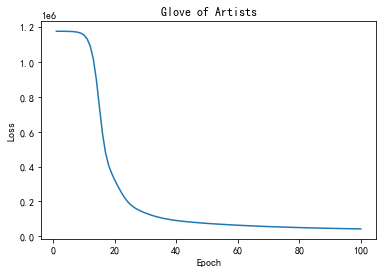

In [59]:
leadstring = '/Users/wenxinxu/Desktop/SDS565/data/playlists/'
with open(leadstring+'artists.txt','r') as f:
    artists=f.readlines() # 3292 artists (vocabulary size)

with open(leadstring+'playlists.txt','r') as f:
    sentences=f.readlines() # 18111 playlists (sentences)

# codes of playlist without row index
sentenceslist = [list(map(int, j.strip().split(' '))) for j in sentences] 

model = Glove(D=100, V = len(artists)) 

model.fit(sentences = sentenceslist,
          step_size = 0.001,
          epochs = 100, 
          xmax=100, 
          alpha=0.75)

**Compare loss to word2vec model and PCA**

In [79]:
w2v_model = word2vec.Word2Vec(sentenceslist, vector_size=100, window=100, min_count=1) 

W = w2v_model.wv.vectors # W is word embeddings matrix in word2vec: (3292, 100)

U,s,VT = scipy.sparse.linalg.svds(X.T, 10) # U is word embeddings matrix in PCA: (3292, 100)

# weight function
V = len(artists)
xmax = 100
alpha = 3/4
fX = np.zeros((V, V))
fX[C < xmax] = (C[C < xmax] / float(xmax))**alpha
fX[C >= xmax] = 1

C[C == 0] = 1   # set unobserved pairs to 1 to avoid log0 error
w2v_loss = (fX * (( W @ W.T - np.log(C))**2)).sum() # C is cooccurence matrix
pca_loss = (fX * (( U @ U.T - np.log(C))**2)).sum()  # C is coocurence matrix
 
w2v_loss, pca_loss # 10e7

(11128420.951959487, 1172457.497055852)